In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading and Inspection

In [4]:
IPL_deliveries = pd.read_csv(r"C:\Users\pc\Downloads\deliveries.csv (1)\deliveries.csv")

In [6]:
IPL_matches = pd.read_csv(r"C:\Users\pc\Downloads\matches (1).csv")

In [8]:
IPL_deliveries.shape

(260920, 17)

In [10]:
IPL_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [12]:
IPL_deliveries.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


### Data Cleaning on  IPL_deliveries

In [15]:
IPL_deliveries[IPL_deliveries.duplicated()]

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder


In [16]:
IPL_deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [19]:
columns_to_drop = ["player_dismissed", "fielder"]
IPL_deliveries.drop(columns=columns_to_drop, inplace=True)
IPL_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'dismissal_kind'],
      dtype='object')

##### -> Dropped the columns since 99% of their data is missing and can corrupt the data quality


In [22]:
IPL_deliveries['dismissal_kind'] = IPL_deliveries['dismissal_kind'].fillna('Not Recorded')
IPL_deliveries['extras_type'] = IPL_deliveries['extras_type'].fillna('Not Recorded')

##### -> Inputed this columns because ill be using them for analyzing

### Data Inspection & Cleaning on IPL_matches

In [26]:
IPL_matches.shape

(1095, 20)

In [28]:
IPL_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [30]:
IPL_matches["date"] = pd.to_datetime(IPL_matches["date"])

##### -> Changed the date data type to datetime for easier maniplulation 

In [33]:
IPL_matches[IPL_matches.duplicated()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2


In [35]:
IPL_matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [37]:
IPL_matches['city'] = IPL_matches['city'].fillna('Unknown')
IPL_matches['player_of_match'] = IPL_matches['player_of_match'].fillna('Unknown')
IPL_matches['winner'] = IPL_matches['winner'].fillna('Unknown')

In [39]:
columns_to_inpute_mean=["result_margin", "target_runs", "target_overs"]
for columns in columns_to_inpute_mean:
    IPL_matches[columns].fillna(IPL_matches[columns].mean(), inplace=True)


In [41]:
IPL_matches.isnull().sum()

id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       0
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin         0
target_runs           0
target_overs          0
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [43]:
columns_to_drop = ["method"]
IPL_matches.drop(columns=columns_to_drop, inplace=True)
IPL_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'umpire1', 'umpire2'],
      dtype='object')

##### -> Dropped the method column since 99% of its data is missing

## EDA ON DELIVERIES DATASET

### Extras Analysis on Deliveries 

#### 1. Most Common Types of Extras

In [48]:
extra_counts = IPL_deliveries["extras_type"].value_counts()

print("Most Common Types of Extras:\n", extra_counts)


Most Common Types of Extras:
 extras_type
Not Recorded    246795
wides             8380
legbyes           4001
noballs           1069
byes               673
penalty              2
Name: count, dtype: int64


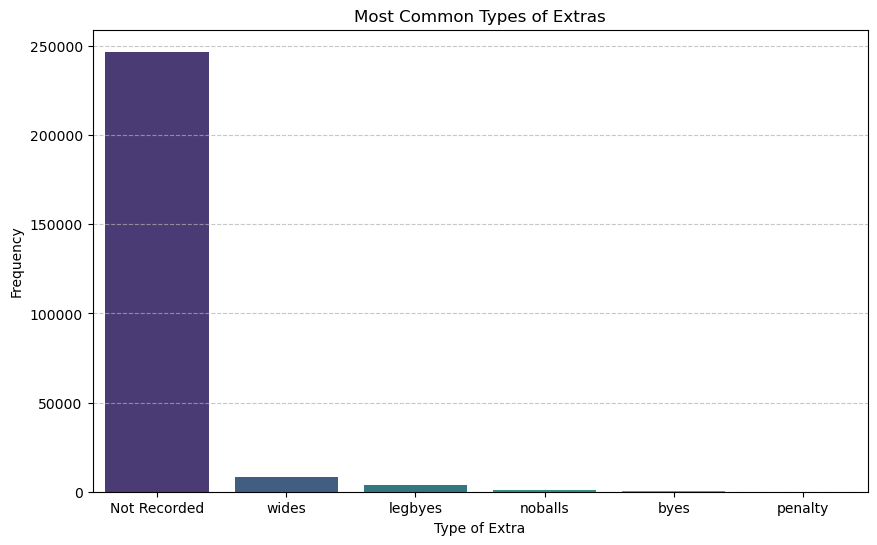

In [50]:
# Count occurrences of each extras type
extra_type_counts = IPL_deliveries["extras_type"].value_counts().reset_index()
extra_type_counts.columns = ["Extras Type", "Count"]

plt.figure(figsize=(10, 6))
sns.barplot(x="Extras Type", y="Count", data=extra_type_counts, palette="viridis")
plt.xlabel("Type of Extra")
plt.ylabel("Frequency")
plt.title("Most Common Types of Extras")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


#### 2. Which Team Conceded the Most Extras?

In [53]:
extras_by_team = IPL_deliveries.groupby("bowling_team")["extra_runs"].sum().sort_values(ascending=False)

print("Total Extras Conceded by Each Team:\n", extras_by_team)


Total Extras Conceded by Each Team:
 bowling_team
Mumbai Indians                 2295
Royal Challengers Bangalore    2040
Kolkata Knight Riders          1957
Rajasthan Royals               1917
Chennai Super Kings            1842
Kings XI Punjab                1571
Delhi Daredevils               1268
Sunrisers Hyderabad            1254
Delhi Capitals                  725
Deccan Chargers                 659
Punjab Kings                    480
Lucknow Super Giants            386
Pune Warriors                   335
Gujarat Titans                  295
Gujarat Lions                   188
Royal Challengers Bengaluru     151
Rising Pune Supergiant          111
Kochi Tuskers Kerala            110
Rising Pune Supergiants         108
Name: extra_runs, dtype: int64


##### -> The Mumbai Indians conceded the most extras

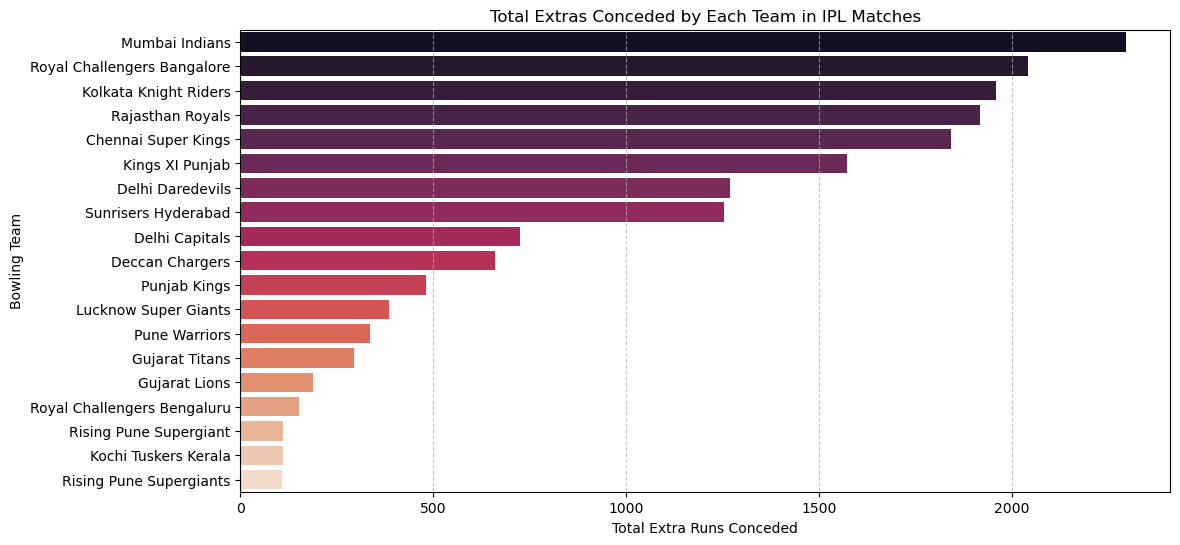

In [56]:
# grouping by bowling team and summing up extra runs
extras_by_team = IPL_deliveries.groupby("bowling_team")["extra_runs"].sum().reset_index()

# sorting values for better visualization
extras_by_team = extras_by_team.sort_values(by="extra_runs", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="extra_runs", y="bowling_team", data=extras_by_team, palette="rocket")

plt.xlabel("Total Extra Runs Conceded")
plt.ylabel("Bowling Team")
plt.title("Total Extras Conceded by Each Team in IPL Matches")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


### Wicket Analysis 

#### 1. Total Number of Wickets

In [59]:
total_wickets = IPL_deliveries[IPL_deliveries["is_wicket"] == 1].shape[0]

print("Total Number of Wickets:", total_wickets)


Total Number of Wickets: 12950


#### 2. Top Bowlers with the Most Wickets

In [62]:
bowlers_wickets = IPL_deliveries[IPL_deliveries["is_wicket"] == 1].groupby("bowler")["is_wicket"].count()

top_bowlers = bowlers_wickets.sort_values(ascending=False).head(10)

print("Top Bowlers with Most Wickets:\n", top_bowlers)



Top Bowlers with Most Wickets:
 bowler
YS Chahal     213
DJ Bravo      207
PP Chawla     201
SP Narine     200
R Ashwin      198
B Kumar       195
SL Malinga    188
A Mishra      183
JJ Bumrah     182
RA Jadeja     169
Name: is_wicket, dtype: int64


#### 3.  Most Common Dismissal Types

In [65]:
# counting occurrences of each dismissal type (excluding 'NA')
dismissal_counts = IPL_deliveries[IPL_deliveries["dismissal_kind"] != "NA"]["dismissal_kind"].value_counts()

print("Most Common Dismissal Types:\n", dismissal_counts)


Most Common Dismissal Types:
 dismissal_kind
Not Recorded             247970
caught                     8063
bowled                     2212
run out                    1114
lbw                         800
caught and bowled           367
stumped                     358
retired hurt                 15
hit wicket                   15
obstructing the field         3
retired out                   3
Name: count, dtype: int64


##### -> The majority of the entries (247,970) have dismissals categorized as "Not Recorded", followed by caught, bowled, run out, LBW, and other less common dismissal types. This gives a clear picture of how batsmen were most commonly dismissed in the matches covered by the dataset. 

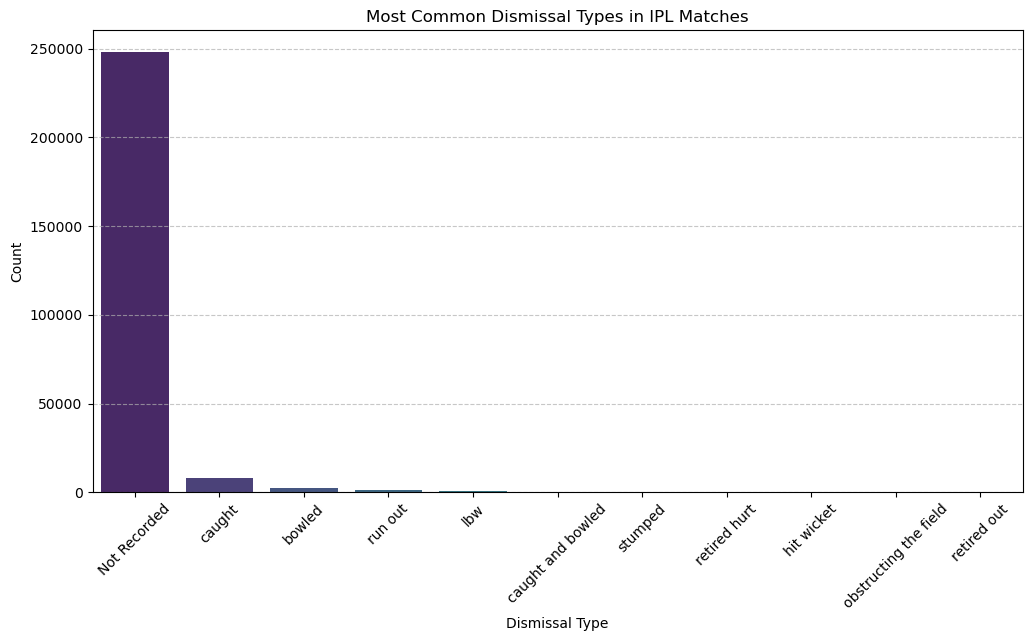

In [68]:
# Count the occurrences of each dismissal type
dismissal_counts = IPL_deliveries["dismissal_kind"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=dismissal_counts.index, y=dismissal_counts.values, palette="viridis")

plt.xlabel("Dismissal Type")
plt.ylabel("Count")
plt.title("Most Common Dismissal Types in IPL Matches")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

#### 4. Top Bowlers with the Most Dismissals

In [71]:
# count dismissals for each bowler (excluding 'run out' as it's usually not credited to a bowler)
bowlers_dismissals = IPL_deliveries[(IPL_deliveries["dismissal_kind"] != "NA") & 
                        (IPL_deliveries["dismissal_kind"] != "run out")].groupby("bowler")["is_wicket"].sum()

top_bowlers = bowlers_dismissals.sort_values(ascending=False).head(10)

print("Top Bowlers with Most Dismissals:\n", top_bowlers)


Top Bowlers with Most Dismissals:
 bowler
YS Chahal     205
PP Chawla     192
DJ Bravo      183
R Ashwin      181
B Kumar       181
SP Narine     180
A Mishra      174
SL Malinga    170
JJ Bumrah     168
RA Jadeja     160
Name: is_wicket, dtype: int64


##### -> These bowlers have been the most effective in taking wickets, making them key players in their respective teams. Their ability to consistently dismiss batsmen highlights their skill and impact on the matches.

### Batsman Performance Analysis

#### 1. Most Runs Scored by a Batsman

In [76]:
batsman_runs = IPL_deliveries.groupby("batter")["batsman_runs"].sum()

top_scorers = batsman_runs.sort_values(ascending=False).head(10)

print("Top 10 Batsmen with Most Runs:\n", top_scorers)


Top 10 Batsmen with Most Runs:
 batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64


#### 2. Highest Strike Rate

##### The strike rate is calculated as:

##### strike rate = (Total Runs / Total balls faced) * 100

In [80]:
# total balls faced by each batsman
balls_faced = IPL_deliveries.groupby("batter")["ball"].count()

# Calculate strike rate
strike_rate = (batsman_runs / balls_faced) * 100

top_strike_rates = strike_rate.sort_values(ascending=False).head(10)

print("Top 10 Batsmen with Highest Strike Rate:\n", top_strike_rates)


Top 10 Batsmen with Highest Strike Rate:
 batter
L Wood             300.000000
B Stanlake         250.000000
J Fraser-McGurk    220.000000
R Sai Kishore      216.666667
Umar Gul           205.263158
RS Sodhi           200.000000
Shahid Afridi      176.086957
I Malhotra         175.000000
WG Jacks           172.932331
PD Salt            169.610390
dtype: float64


##### -> These batsmen have achieved exceptionally high strike rates, indicating their ability to score runs quickly relative to the number of balls they face. A high strike rate is often a sign of an aggressive and effective batting style, which is crucial in formats like T20 cricket.

### Bowler Performance Analysis

#### 1. Lowest Economy Rate (Best Economy Rate)

##### Economy rate is calculated as:

##### Economy Rate = Total Runs Conceded / Total Overs Bowled

In [85]:
# total runs conceded by each bowler
bowler_runs = IPL_deliveries.groupby("bowler")["total_runs"].sum()

# count number of balls bowled by each bowler
balls_bowled = IPL_deliveries[IPL_deliveries["extras_type"] != "wides"].groupby("bowler")["ball"].count()

# convert balls to overs (6 balls = 1 over)
overs_bowled = balls_bowled / 6

# compute economy rate
economy_rate = (bowler_runs / overs_bowled).reset_index()
economy_rate.columns = ["bowler", "economy_rate"]

# sort by economy rate (ascending order )
best_economy = economy_rate.sort_values(by="economy_rate", ascending=True)

print("Bowlers with the best economy rates:")
print(best_economy.head(10))


Bowlers with the best economy rates:
            bowler  economy_rate
24    AC Gilchrist      0.000000
364     R Ravindra      3.500000
317       NB Singh      4.500000
460    Sachin Baby      4.800000
38       AM Rahane      5.000000
125    DJ Thornely      5.714286
453      SS Mundhe      6.000000
245  LA Carseldine      6.000000
260       M Manhas      6.000000
296       MW Short      6.250000


##### -> These bowlers have achieved the lowest economy rates, meaning they have been the most economical in terms of runs conceded per over. An economy rate of 0.00 indicates that AC Gilchrist did not concede any runs in the overs he bowled, which is exceptional. The rest of the bowlers listed have also maintained impressively low economy rates, making them highly effective in limiting the opposition's scoring.

#### 2. Most Wickets Taken

In [89]:
# Filter only rows where a wicket was taken
wicket_deliveries = IPL_deliveries[(IPL_deliveries["is_wicket"] == 1) & (~IPL_deliveries["dismissal_kind"].isin(["run out", "retired hurt"]))]

# Count wickets per bowler
most_wickets = wicket_deliveries.groupby("bowler")["is_wicket"].sum().reset_index()

# Sort by most wickets
most_wickets = most_wickets.sort_values(by="is_wicket", ascending=False)

print("Top wicket-takers:")
print(most_wickets.head(10))


Top wicket-takers:
         bowler  is_wicket
445   YS Chahal        205
297   PP Chawla        192
102    DJ Bravo        183
61      B Kumar        181
379   SP Narine        180
304    R Ashwin        180
7      A Mishra        174
372  SL Malinga        170
168   JJ Bumrah        168
319   RA Jadeja        160


##### -> These bowlers have achieved the highest number of dismissals, making them the top wicket-takers in the dataset. Their ability to consistently take wickets highlights their key role in their respective teams' bowling line-ups.

### Over-wise Analysis

#### 1. Runs Scored in Each Over

In [93]:
# group by over and sum of total_runs to get runs scored in each over
runs_per_over = IPL_deliveries.groupby("over")["total_runs"].sum().reset_index()


runs_per_over = runs_per_over.sort_values(by="over")

print("Runs scored in each over:")
print(runs_per_over)


Runs scored in each over:
    over  total_runs
0      0       13651
1      1       16163
2      2       17895
3      3       18415
4      4       18565
5      5       18528
6      6       14839
7      7       15981
8      8       16639
9      9       16353
10    10       16779
11    11       17076
12    12       17205
13    13       17634
14    14       18149
15    15       18472
16    16       19012
17    17       19559
18    18       19076
19    19       17765


##### -> There's a consistent increase in runs scored as the innings progress, with notable peaks in the middle and death overs, reflecting teams' efforts to accelerate scoring in these crucial phases.

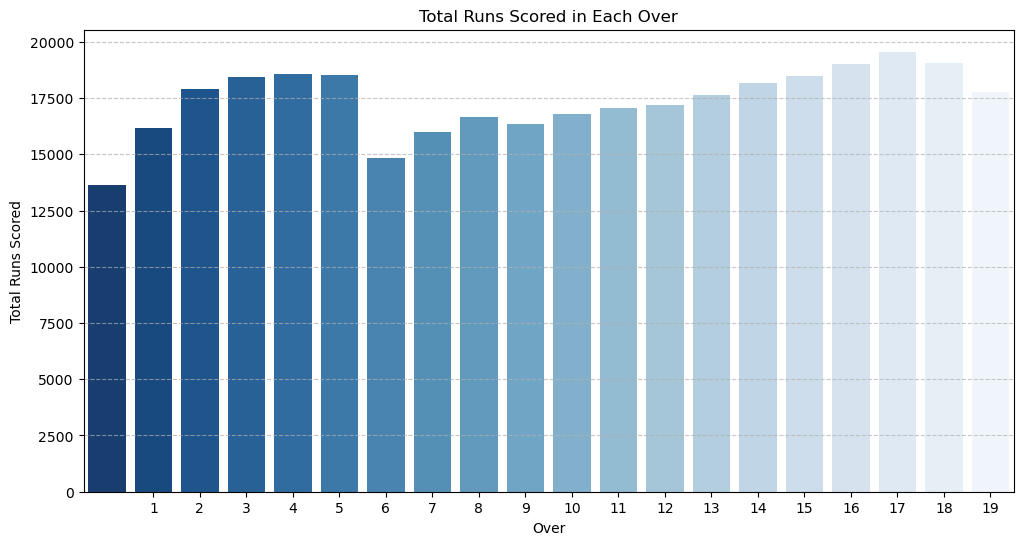

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns


runs_per_over = IPL_deliveries.groupby("over")["total_runs"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="over", y="total_runs", data=runs_per_over, palette="Blues_r")
plt.xlabel("Over")
plt.ylabel("Total Runs Scored")
plt.title("Total Runs Scored in Each Over")
plt.xticks(range(1, max(runs_per_over["over"]) + 1)) 
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


#### 2. Fall of Wickets Per Over

In [99]:
# count number of wickets fallen per over
wickets_per_over = IPL_deliveries[IPL_deliveries["is_wicket"] == 1].groupby("over")["is_wicket"].count().reset_index()

wickets_per_over = wickets_per_over.sort_values(by="over")

print("Fall of wickets per over:")
print(wickets_per_over)


Fall of wickets per over:
    over  is_wicket
0      0        463
1      1        503
2      2        533
3      3        548
4      4        576
5      5        540
6      6        444
7      7        472
8      8        537
9      9        498
10    10        568
11    11        567
12    12        585
13    13        633
14    14        695
15    15        736
16    16        779
17    17        976
18    18        989
19    19       1308


##### -> There's a noticeable increase in the number of wickets taken in the later overs, with a significant peak in the final over, reflecting the high-pressure, aggressive batting and strategic bowling often seen at the end of an innings.

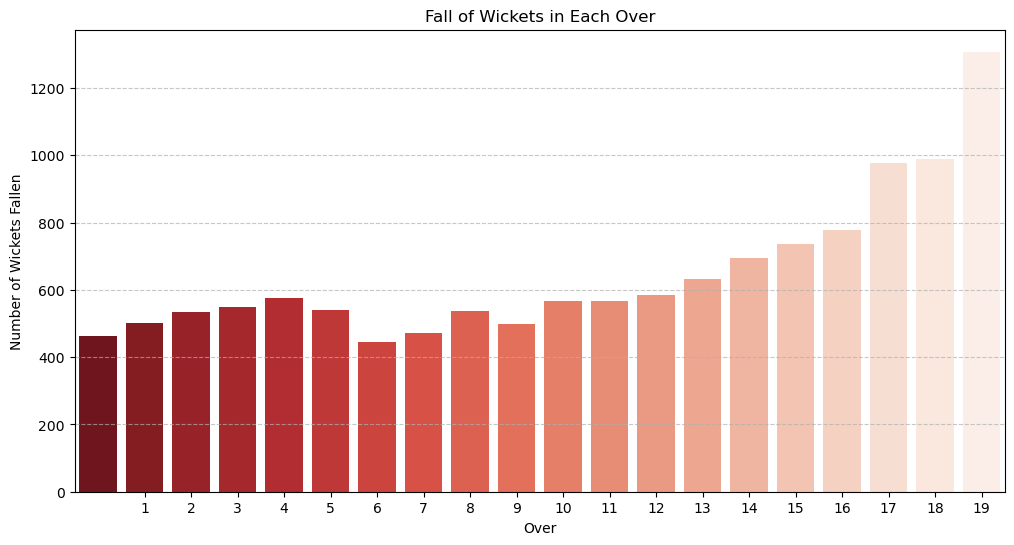

In [279]:

wickets_per_over = IPL_deliveries[IPL_deliveries["is_wicket"] == 1].groupby("over")["is_wicket"].count().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="over", y="is_wicket", data=wickets_per_over, palette="Reds_r")
plt.xlabel("Over")
plt.ylabel("Number of Wickets Fallen")
plt.title("Fall of Wickets in Each Over")
plt.xticks(range(1, max(wickets_per_over["over"]) + 1))  
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## EDA ON MATCHES DATASET

###  Total Number of Matches Played

In [106]:
total_matches = IPL_matches.shape[0]
print(f"Total Matches Played: {total_matches}")


Total Matches Played: 1095


#### Number of Matches Won by Each Team

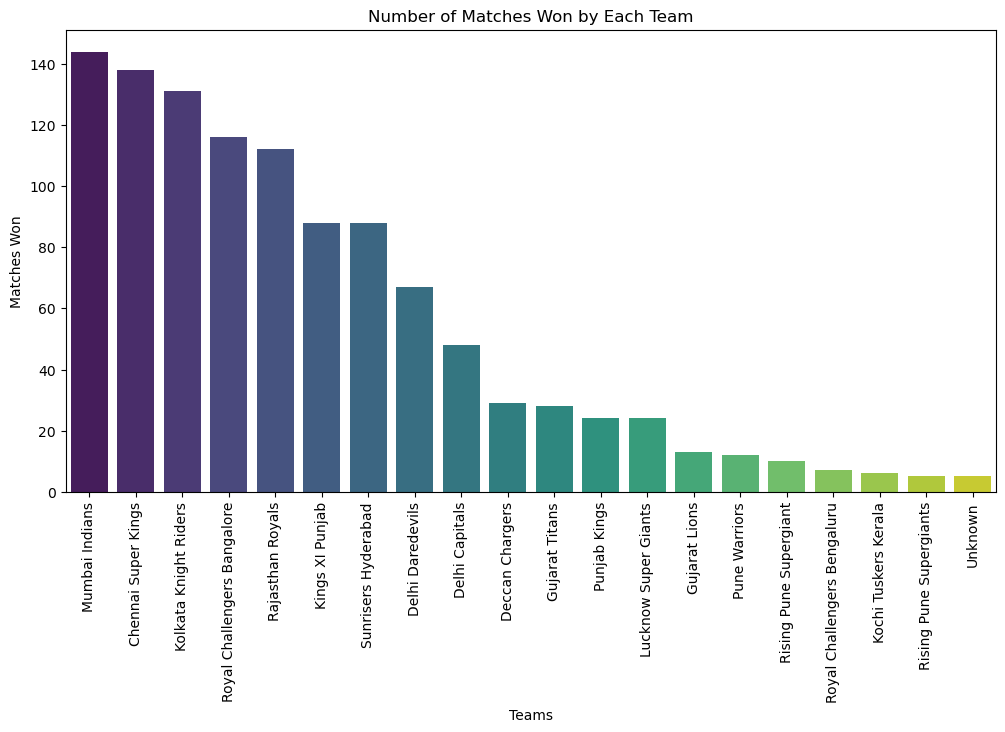

In [109]:
matches_won =IPL_matches['winner'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=matches_won.index, y=matches_won.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Matches Won")
plt.title("Number of Matches Won by Each Team")
plt.show()


##### -> The bar chart is showing the number of matches won by each team in the Indian Premier League (IPL). Mumbai Indians, Chennai Super Kings, and Kolkata Knight Riders have the highest number of wins, while teams like Rising Pune Supergiant and Kochi Tuskers Kerala have the fewest wins. This chart provides a visual comparison of the performance of different IPL teams over time.

### Number of Matches Played at Each Venue

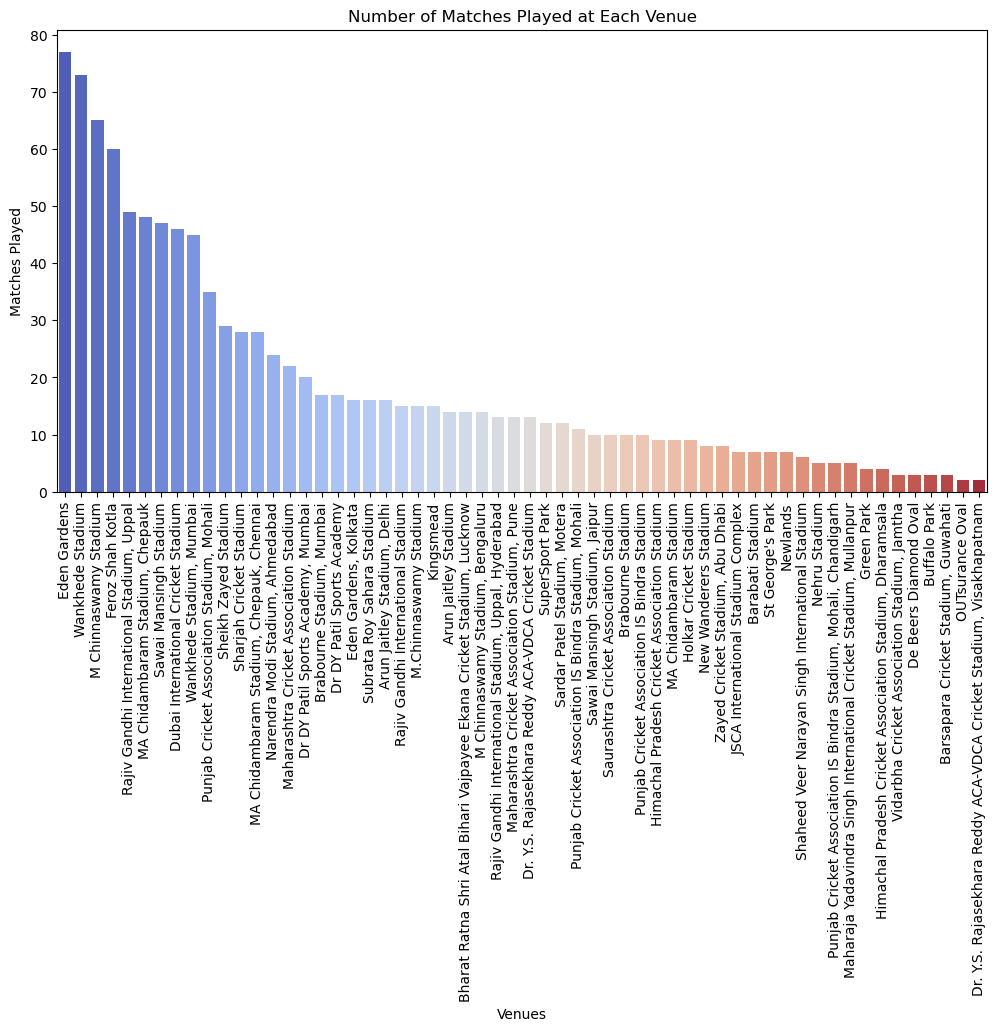

In [113]:
matches_per_venue = IPL_matches['venue'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=matches_per_venue.index, y=matches_per_venue.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Venues")
plt.ylabel("Matches Played")
plt.title("Number of Matches Played at Each Venue")
plt.show()


##### -> The bar chart displays the number of IPL cricket matches played at various venues. Eden Gardens leads with the highest number of matches, followed by Wankhede Stadium, M Chinnaswamy Stadium, and other stadiums. This chart helps to visually understand how frequently each venue has been used for IPL matches.

###  Most Common Match Result Types

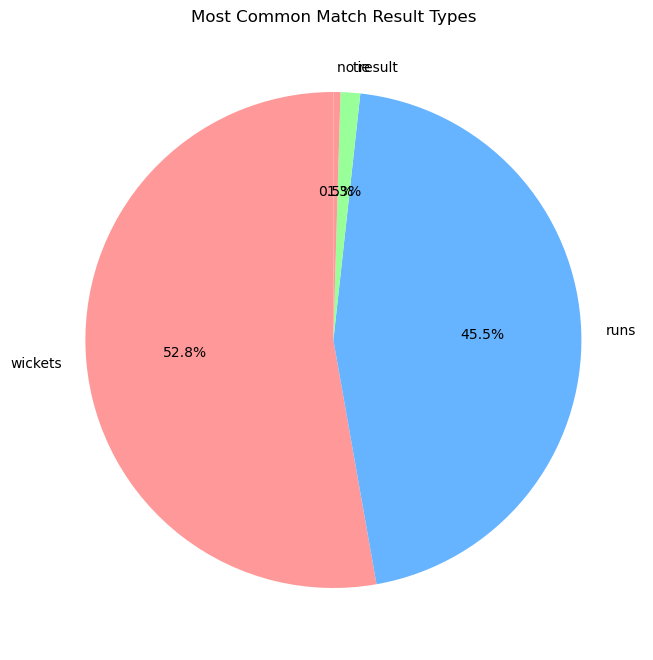

In [116]:
match_results = IPL_matches['result'].value_counts()

plt.figure(figsize=(8,12))
match_results.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.ylabel('')
plt.title("Most Common Match Result Types")
plt.show()


##### -> The chart highlights that the majority of IPL matches are decided by wickets, followed by runs, with a very small percentage resulting in no result.

### Toss Analysis

#### 1.Toss Decisions Breakdown (Bat First vs. Field First)

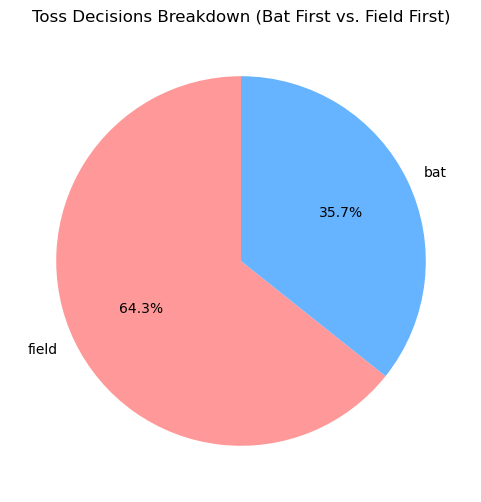

In [121]:
toss_decisions = IPL_matches['toss_decision'].value_counts()

plt.figure(figsize=(6, 6))
toss_decisions.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.ylabel('')
plt.title("Toss Decisions Breakdown (Bat First vs. Field First)")
plt.show()


#### -> The chart represents the decisions made by IPL teams after winning the toss, highlighting a preference for fielding first. This analysis provides insights into team strategies in the IPL.

#### 2.Team with the Highest Toss Wins

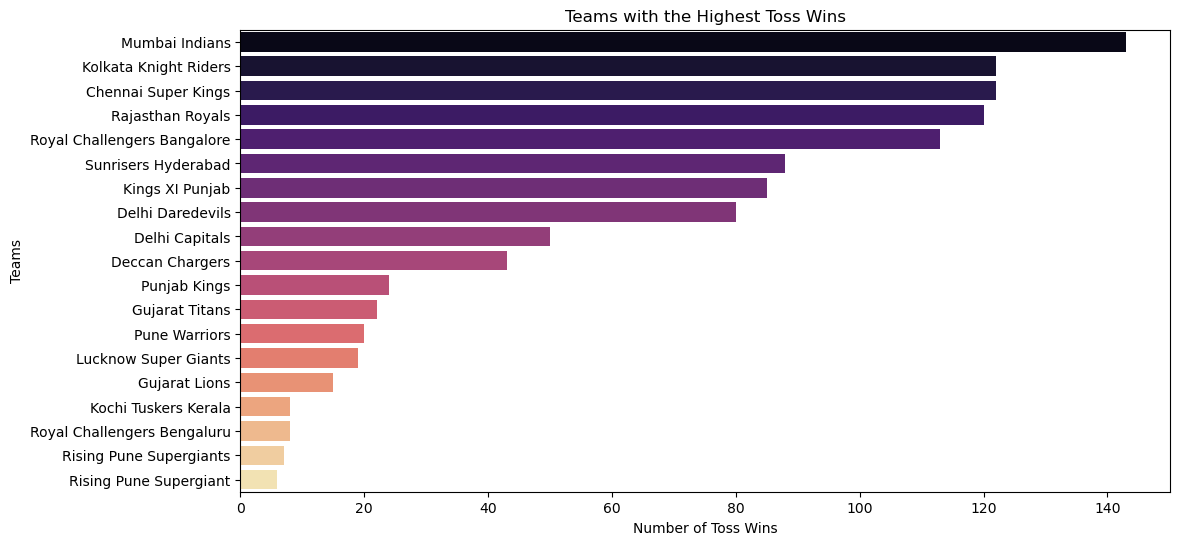

In [125]:
toss_wins = IPL_matches['toss_winner'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(y=toss_wins.index, x=toss_wins.values, palette="magma")
plt.xlabel("Number of Toss Wins")
plt.ylabel("Teams")
plt.title("Teams with the Highest Toss Wins")
plt.show()


#### -> The chart includes teams like Mumbai Indians, Kolkata Knight Riders, Chennai Super Kings, and more, arranged from highest to lowest toss wins. The x-axis represents the number of toss wins, while the y-axis lists the teams. This chart provides insight into how frequently each team wins the toss, which can be a strategic advantage in cricket.

#### 3.  Impact of Toss on Match Results

In [129]:
toss_impact = IPL_matches[IPL_matches['toss_winner'] == IPL_matches['winner']].shape[0]
total_matches = IPL_matches.shape[0]
win_percentage = (toss_impact / total_matches) * 100

print(f"Teams winning the toss also won the match in {win_percentage:.2f}% of the cases.")


Teams winning the toss also won the match in 50.59% of the cases.


### Player of the Match Insights 

#### 1. Most "Player of the Match" Awards

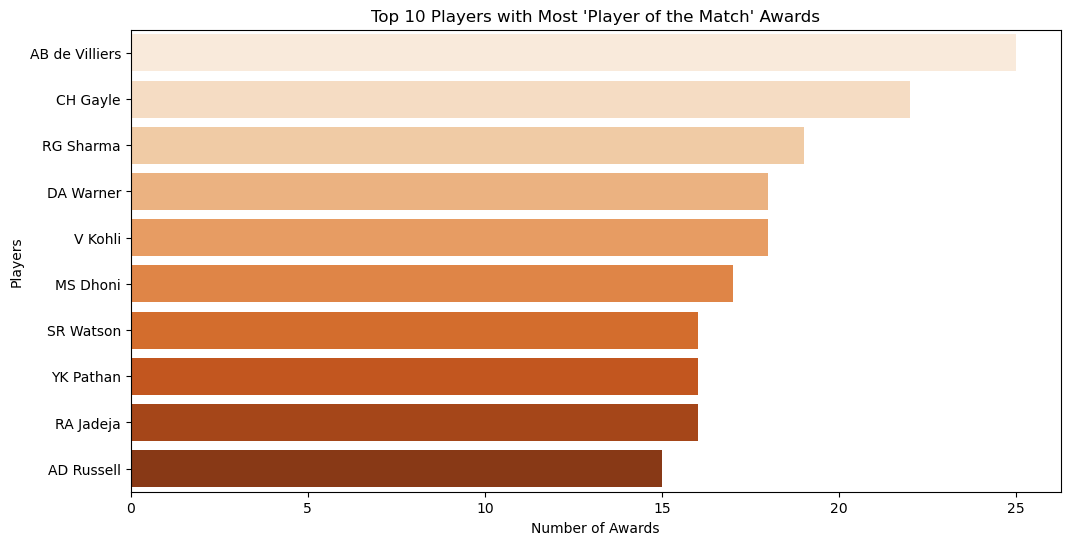

In [132]:
pom_counts = IPL_matches['player_of_match'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=pom_counts.values, y=pom_counts.index, palette="Oranges")
plt.xlabel("Number of Awards")
plt.ylabel("Players")
plt.title("Top 10 Players with Most 'Player of the Match' Awards")
plt.show()


##### -> The bar chart highlights the top 10 IPL players with the most awards. AB de Villiers leads with the highest number of awards, followed by players like Chris Gayle, Rohit Sharma, and David Warner. This visualization underscores the significant contributions of these players in the IPL based on their 'Player of the Match' awards.

#### 2.  Players with the Most Awards per Team

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


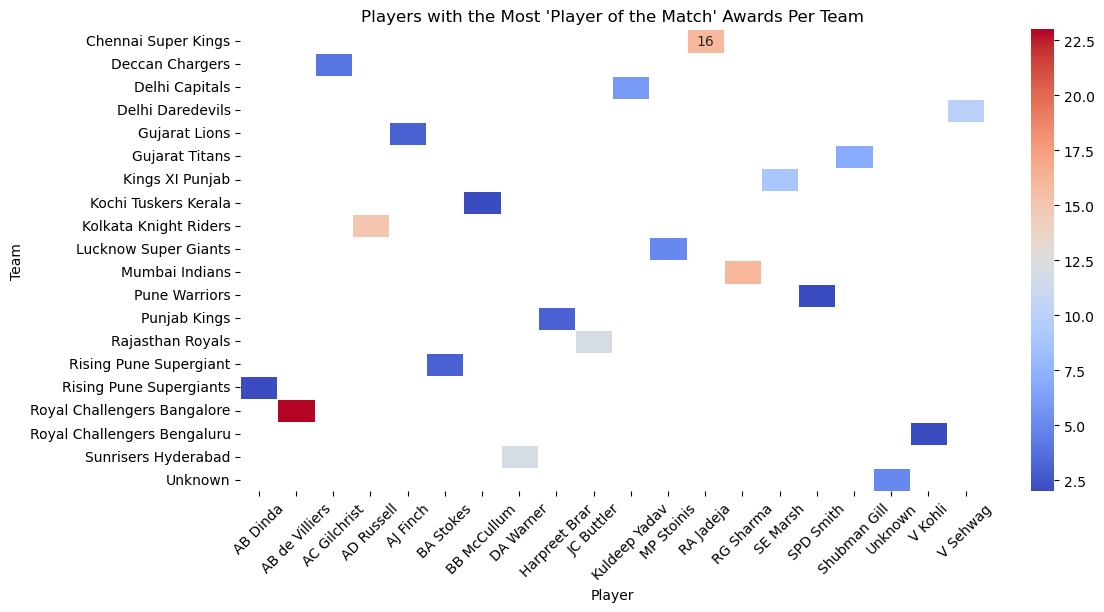

In [136]:
top_players_per_team = IPL_matches.groupby(['winner', 'player_of_match']).size().reset_index(name='count')
top_players_per_team = top_players_per_team.loc[top_players_per_team.groupby('winner')['count'].idxmax()]


plt.figure(figsize=(12, 6))
heatmap_data = top_players_per_team.pivot_table(index="winner", columns="player_of_match", values="count", aggfunc="sum")
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)
plt.xlabel("Player")
plt.ylabel("Team")
plt.title("Players with the Most 'Player of the Match' Awards Per Team")
plt.xticks(rotation=45)
plt.show()


##### -> The heatmap illustrates the number of 'Player of the Match' awards won by different IPL players for various teams. It shows players like AB de Villiers, Chris Gayle, and David Warner leading in awards. Teams such as Mumbai Indians, Chennai Super Kings, and Royal Challengers Bangalore have players with high award counts. The darker the color on the heatmap, the more awards a player has won for that team, highlighting their impact in the IPL.

#### 3. Stadiums Where Players Perform Best

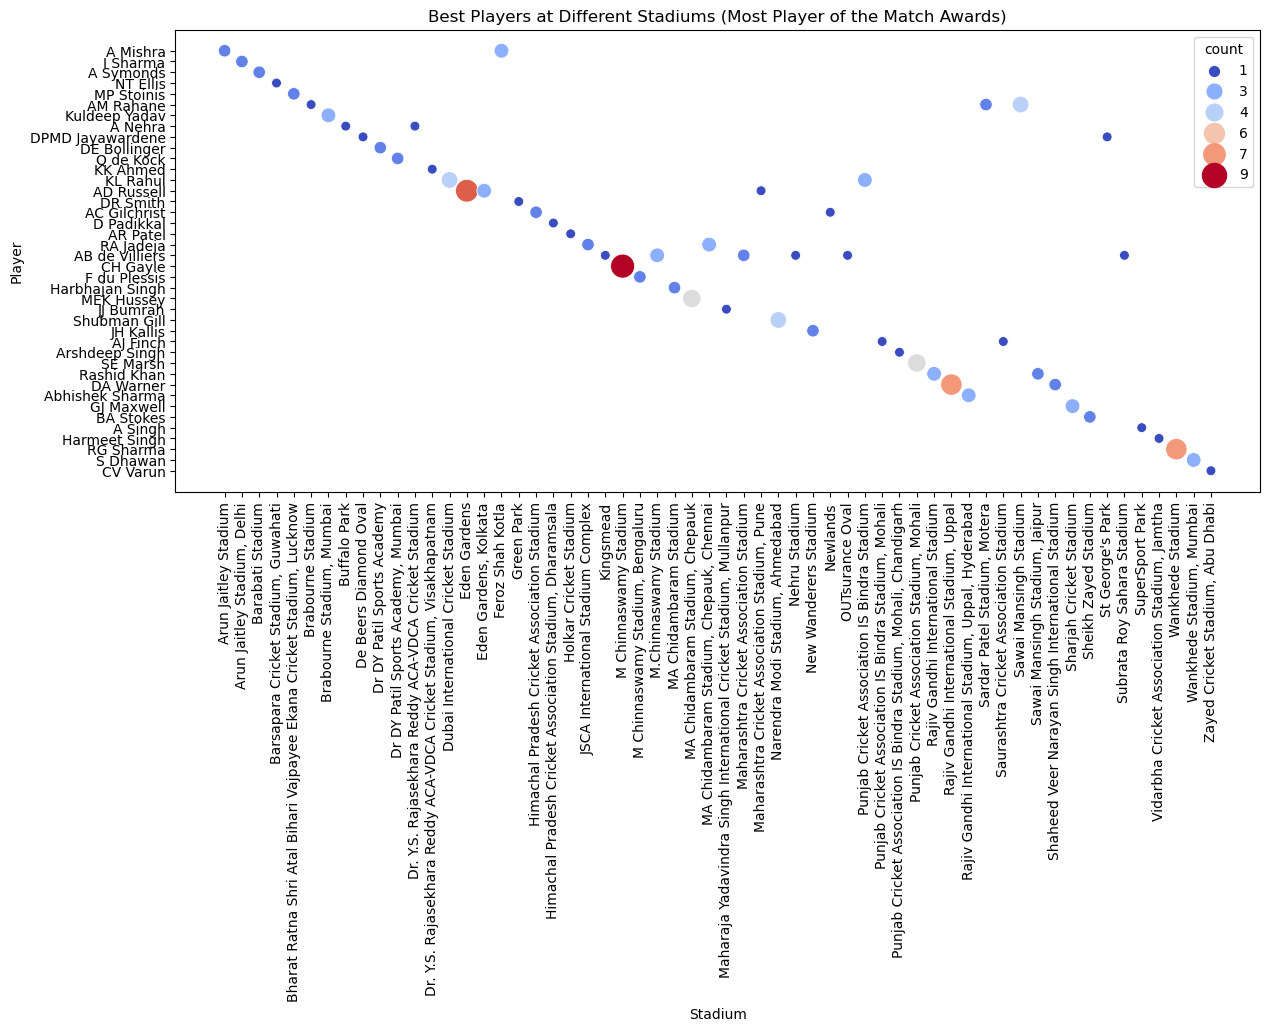

In [140]:
stadium_performance = IPL_matches.groupby(['venue', 'player_of_match']).size().reset_index(name='count')
top_performers = stadium_performance.loc[stadium_performance.groupby('venue')['count'].idxmax()]

plt.figure(figsize=(14, 6))
sns.scatterplot(x=top_performers['venue'], y=top_performers['player_of_match'], size=top_performers['count'], hue=top_performers['count'], palette="coolwarm", sizes=(50, 300))
plt.xticks(rotation=90)
plt.xlabel("Stadium")
plt.ylabel("Player")
plt.title("Best Players at Different Stadiums (Most Player of the Match Awards)")
plt.show()


##### -> The scatter plot shows which players have received the most Player of the Match awards at various stadiums in the IPL. The size and color of the data points indicate the number of awards, with a legend showing a gradient from blue (1 award) to red (9 awards). This visualization provides insights into which players have performed exceptionally well at specific stadiums.

### Team Performance Analysis

#### 1. Most Successful Team in IPL History

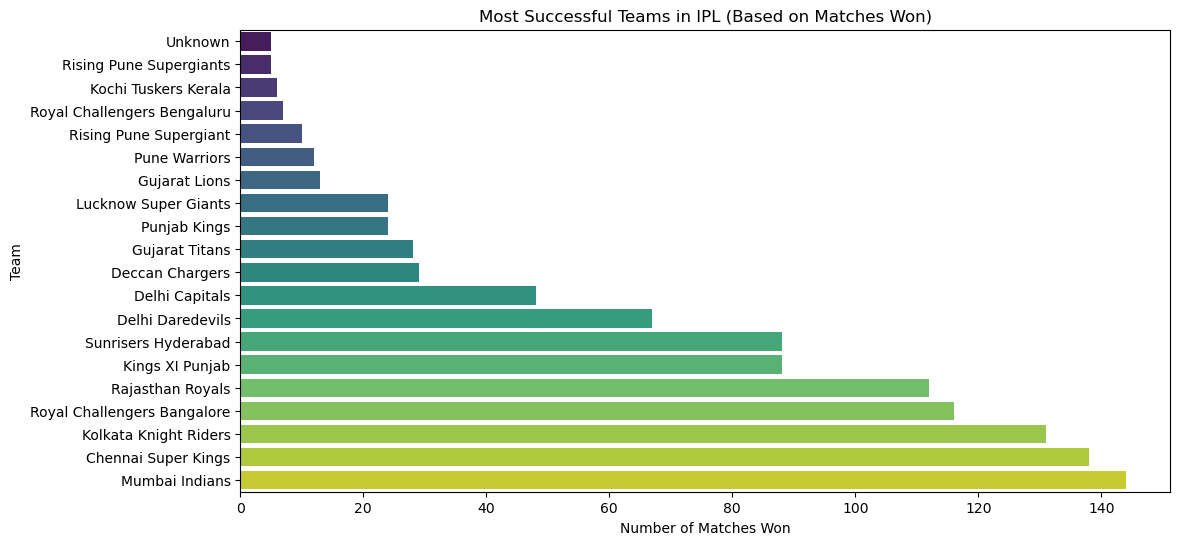

In [148]:
team_wins = IPL_matches['winner'].value_counts().reset_index()
team_wins.columns = ['Team', 'Wins']

team_wins = team_wins.sort_values(by='Wins', ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(y=team_wins['Team'], x=team_wins['Wins'], palette='viridis')

plt.xlabel("Number of Matches Won")
plt.ylabel("Team")
plt.title("Most Successful Teams in IPL (Based on Matches Won)")
plt.show()

#### 2. Home vs. Away Performance for Teams

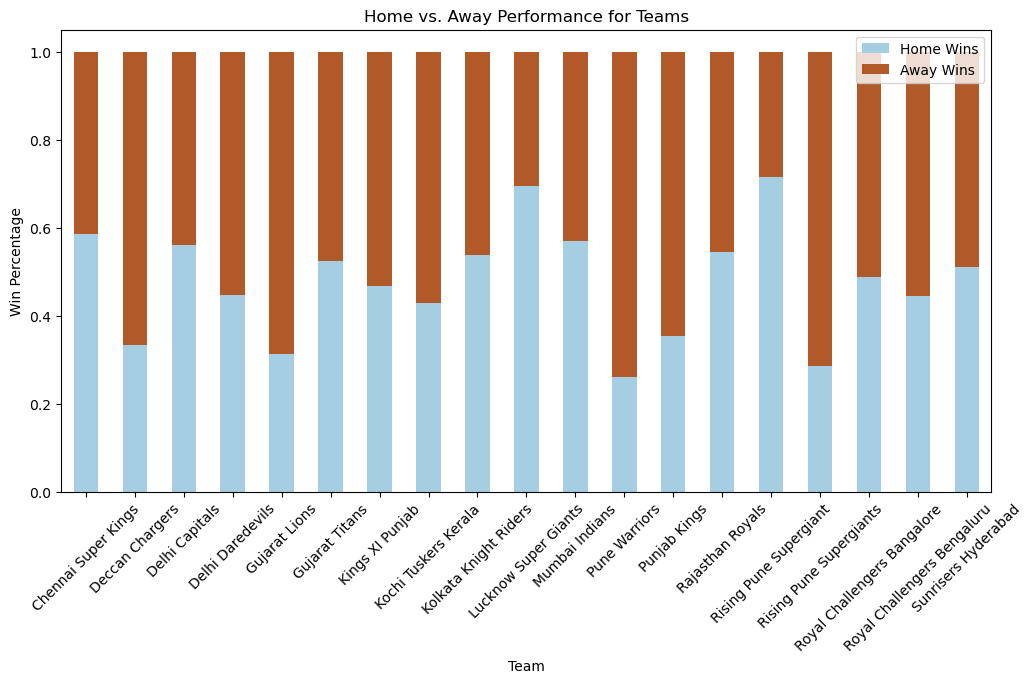

In [154]:
IPL_matches['home_team_won'] = IPL_matches['winner'] == IPL_matches['team1']
home_vs_away = IPL_matches.groupby('team1')['home_team_won'].mean().reset_index()
home_vs_away.columns = ['Team', 'Home Win %']
home_vs_away['Away Win %'] = 1 - home_vs_away['Home Win %']

home_vs_away.set_index('Team').plot(kind='bar', stacked=True, figsize=(12, 6), colormap="Paired")
plt.ylabel("Win Percentage")
plt.title("Home vs. Away Performance for Teams")
plt.legend(["Home Wins", "Away Wins"])
plt.xticks(rotation=45)
plt.show()


##### -> most teams tend to have a higher win percentage at home, which could be attributed to factors such as familiarity with the pitch conditions, local crowd support, and reduced travel fatigue.

### Venue-Based Analysis
#### 1. Most matches played at each stadium.

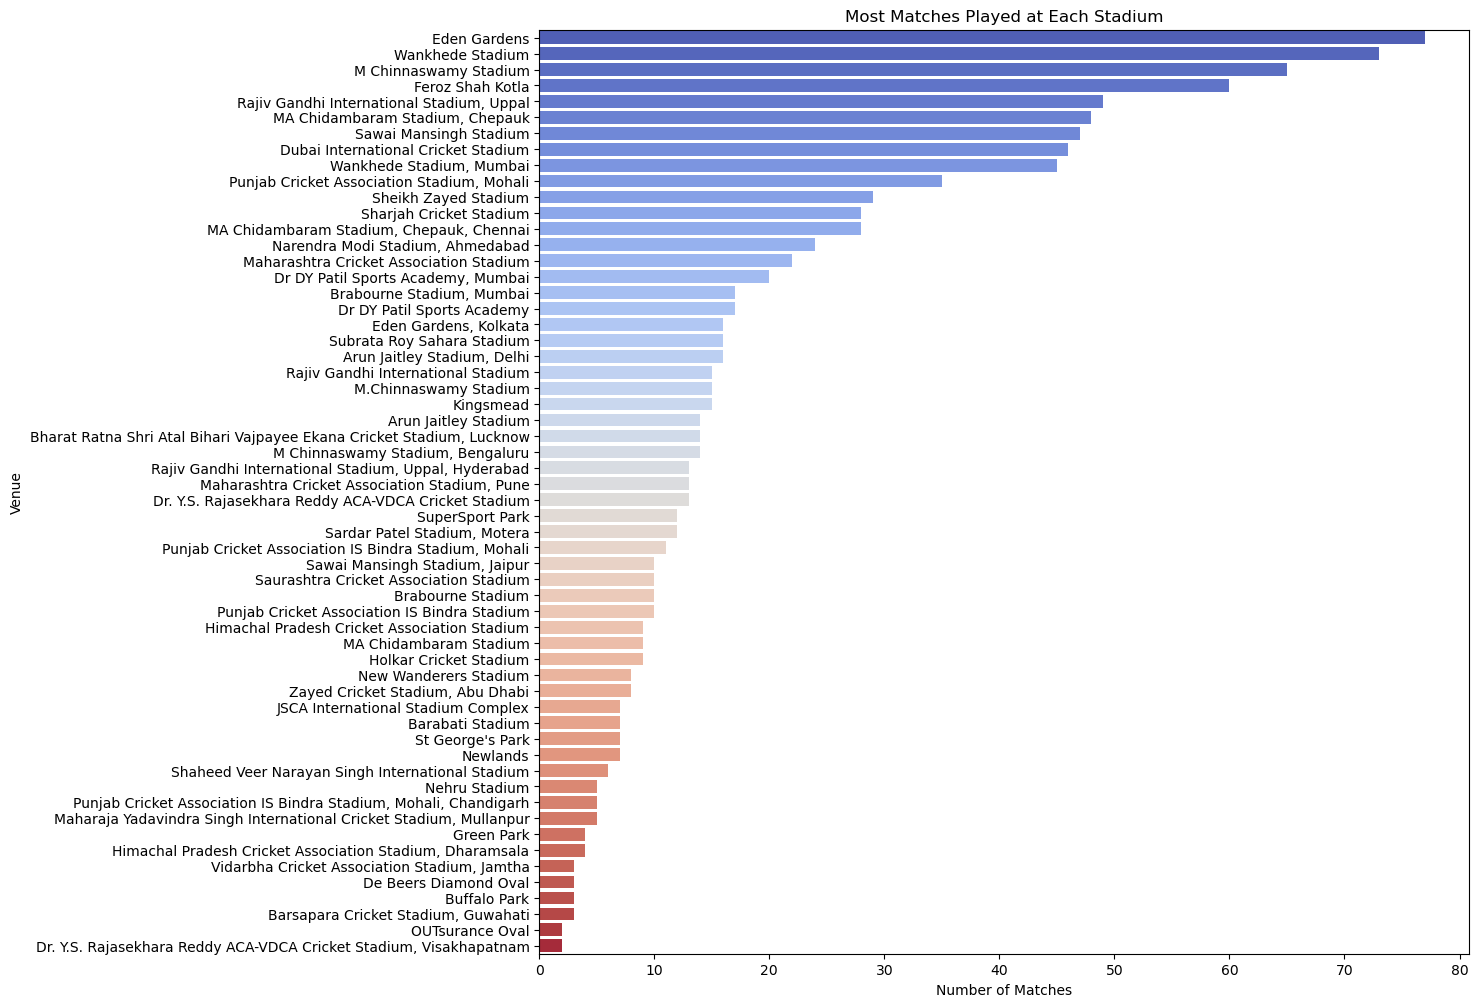

In [172]:
venue_counts = IPL_matches['venue'].value_counts().reset_index()
venue_counts.columns = ['Venue', 'Matches']

plt.figure(figsize=(12, 12))
sns.barplot(y=venue_counts['Venue'], x=venue_counts['Matches'], palette='coolwarm')
plt.xlabel("Number of Matches")
plt.ylabel("Venue")
plt.title("Most Matches Played at Each Stadium")
plt.show()


#### 2. Stadiums Where Teams Have the Best Win Rates

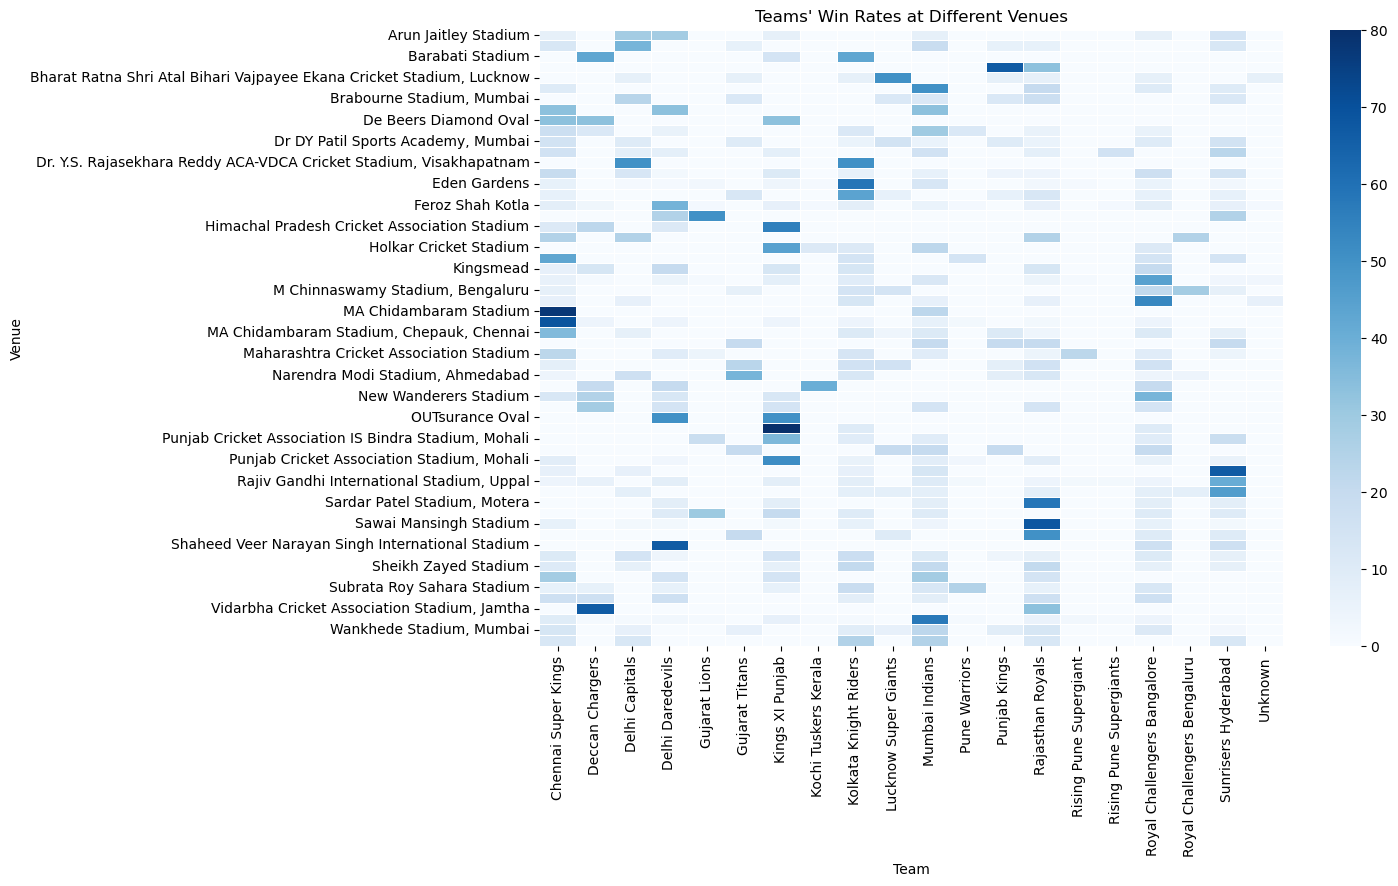

In [174]:
venue_wins = IPL_matches.groupby(['venue', 'winner']).size().unstack(fill_value=0)
venue_totals = IPL_matches['venue'].value_counts()
venue_win_rates = (venue_wins.div(venue_totals, axis=0) * 100).fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(venue_win_rates, cmap='Blues', annot=False, linewidths=0.5)
plt.xlabel("Team")
plt.ylabel("Venue")
plt.title("Teams' Win Rates at Different Venues")
plt.show()


##### -> The heatmap titled "Teams' Win Rates at Different Venues" from the Jupyter Notebook provides a detailed visualization of the win rates of various IPL teams across different venues
##### ~ Chennai Super Kings (CSK): CSK shows strong win rates at multiple venues, especially at their home ground, MA Chidambaram Stadium, and other prominent stadiums like Eden Gardens and Wankhede Stadium.
##### ~ Mumbai Indians (MI): MI also displays high win rates at their home ground, Wankhede Stadium, and other venues such as Eden Gardens and Rajiv Gandhi International Stadium.
##### ~ Kolkata Knight Riders (KKR): KKR has impressive win rates at Eden Gardens and other stadiums like M Chinnaswamy Stadium and Rajiv Gandhi International Stadium.
##### ~ Sunrisers Hyderabad (SRH): SRH exhibits strong performances at Rajiv Gandhi International Stadium and other venues like MA Chidambaram Stadium and Feroze Shah Kotla.
##### ~ Royal Challengers Bangalore (RCB): RCB shows balanced win rates across various venues, with notable performances at M Chinnaswamy Stadium and MA Chidambaram Stadium.
##### -> the heatmap highlights the importance of venue familiarity and home ground advantage for IPL teams. Teams tend to have higher win rates at their home grounds, likely due to factors such as familiarity with pitch conditions, local crowd support, and reduced travel fatigue.

#### 3. High-Scoring vs. Low-Scoring Venues

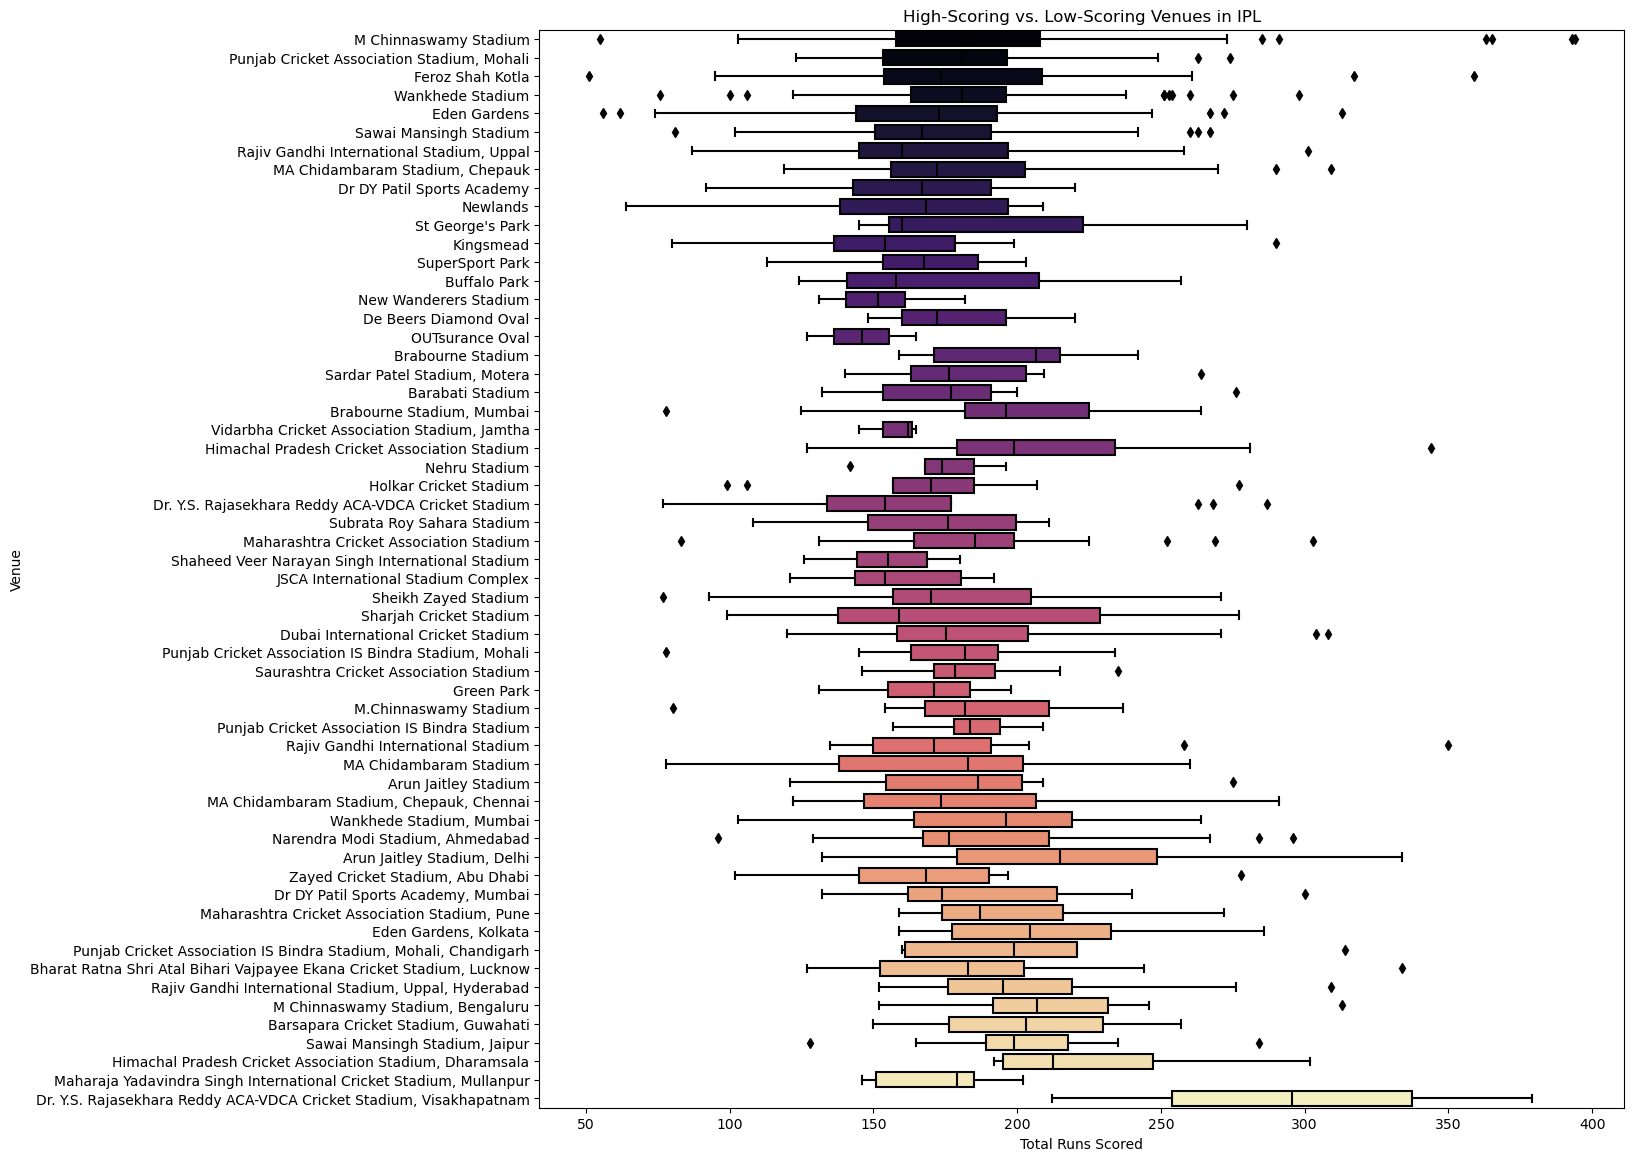

In [185]:
IPL_matches['total_runs'] = IPL_matches['target_runs'] + IPL_matches['result_margin']

IPL_matches = IPL_matches.dropna(subset=['total_runs'])

plt.figure(figsize=(14, 14))
sns.boxplot(y=IPL_matches['venue'], x=IPL_matches['total_runs'], palette='magma')
plt.xlabel("Total Runs Scored")
plt.ylabel("Venue")
plt.title("High-Scoring vs. Low-Scoring Venues in IPL")
plt.show()


##### ->High-Scoring Venues: Venues with higher medians and upper ranges of the IQR.
##### ->Low-Scoring Venues: Venues with lower medians and lower ranges of the IQR.
##### ->Consistency: Smaller boxes and shorter whiskers suggest more consistent scoring.

### Margin of Victory Analysis

#### 1.  Largest Wins By Runs 


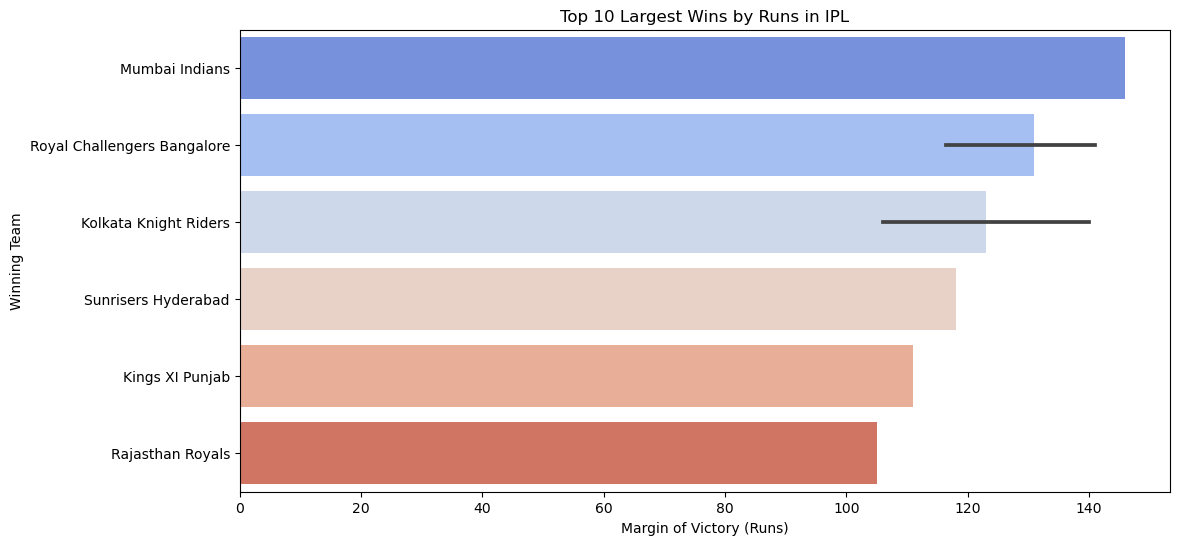

In [190]:
largest_wins_by_runs = IPL_matches.nlargest(10, 'result_margin')

plt.figure(figsize=(12, 6))
sns.barplot(data=largest_wins_by_runs, x='result_margin', y='winner', palette='coolwarm')
plt.xlabel("Margin of Victory (Runs)")
plt.ylabel("Winning Team")
plt.title("Top 10 Largest Wins by Runs in IPL")
plt.show()

##### -> Team Dominance: Teams like Mumbai Indians, Royal Challengers Bangalore, and Kolkata Knight Riders feature prominently, indicating their dominance in certain matches.

##### -> Performance Trends: The results highlight key matches where these teams performed exceptionally well, either through strong batting or effective bowling.

##### -> Strategic Insights: This analysis can be useful for team management and coaching staff to identify strengths and strategize for future matches based on past performances.

#### 2. Largest Wins By Wickets

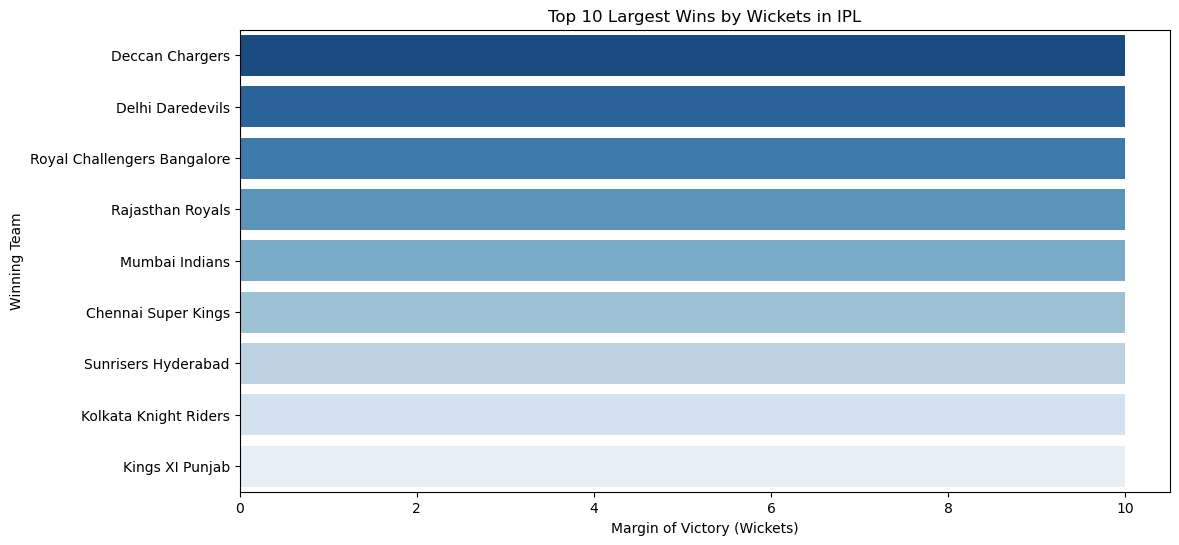

In [196]:
largest_wins_by_wickets = IPL_matches[IPL_matches['result'] == 'wickets'].nlargest(10, 'result_margin')

plt.figure(figsize=(12, 6))
sns.barplot(data=largest_wins_by_wickets, x='result_margin', y='winner', palette='Blues_r')
plt.xlabel("Margin of Victory (Wickets)")
plt.ylabel("Winning Team")
plt.title("Top 10 Largest Wins by Wickets in IPL")
plt.show()

##### -> The bar plot provides a clear visual representation of the top 10 largest wins by wickets in IPL history, highlighting the dominance and consistency of certain teams.
##### -> Dominance: Teams like Deccan Chargers, Delhi Daredevils, and Royal Challengers Bangalore have multiple entries, showcasing their dominance in securing significant wins by wickets
##### -> Performance Consistency: Mumbai Indians, Chennai Super Kings, and Kolkata Knight Riders demonstrate consistent strong performances.
##### -> Strategic Insights: This analysis can be useful for team management and coaching staff to identify strengths and strategize for future matches.

#### 3. Average Winning Margin Across Different Seasons

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


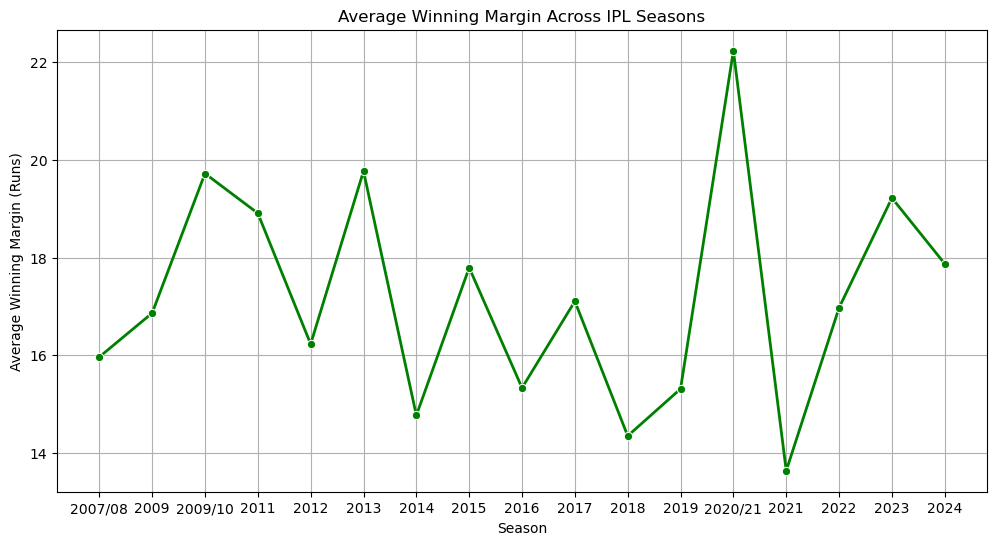

In [201]:
season_avg_margin = IPL_matches.groupby('season')['result_margin'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=season_avg_margin, x='season', y='result_margin', marker='o', linewidth=2, color='green')
plt.xlabel("Season")
plt.ylabel("Average Winning Margin (Runs)")
plt.title("Average Winning Margin Across IPL Seasons")
plt.grid(True)
plt.show()


##### -> The graph illustrates the variation in the average winning margin across different IPL seasons, showing significant fluctuations over the years. The highest peak is observed in the 2020/21 season. This analysis is relevant for understanding trends in team performances and the overall competitiveness of the IPL over the years. It highlights how certain seasons had more substantial winning margins, possibly indicating changes in team strategies, player performance, or other influencing factors. Understanding these trends can help teams and analysts make informed decisions for future matches.

#### 4. Relationship Between Winning Margin and Toss Decision

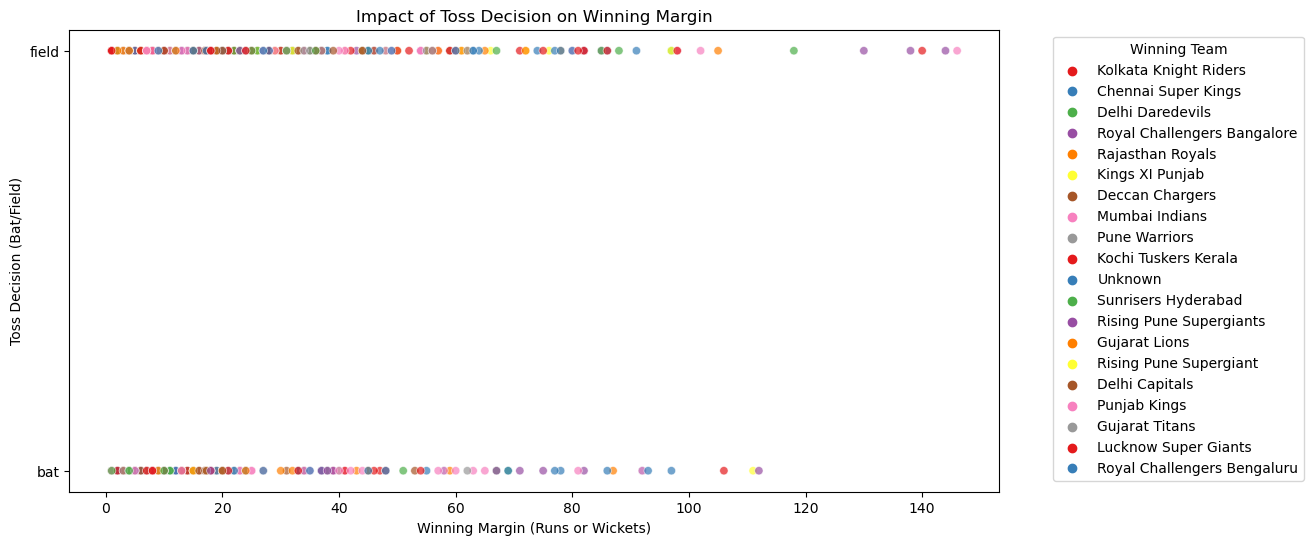

In [209]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=IPL_matches, x='result_margin', y='toss_decision', hue='winner', alpha=0.7, palette='Set1')
plt.xlabel("Winning Margin (Runs or Wickets)")
plt.ylabel("Toss Decision (Bat/Field)")
plt.title("Impact of Toss Decision on Winning Margin")
plt.legend(title="Winning Team", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##### ->Based on the scatter plot, there is no clear pattern or significant impact of toss decisions on the winning margin. The points are scattered across the plot without any noticeable clustering or trend, indicating that the decision to bat or field first does not consistently influence the winning margin in IPL matches. This suggests that other factors, such as team performance, player form, pitch conditions, and match strategies, play a more critical role in determining the outcome of the matches.

### Umpire Analysis

#### 1. Most Matches Officiated by an Umpire

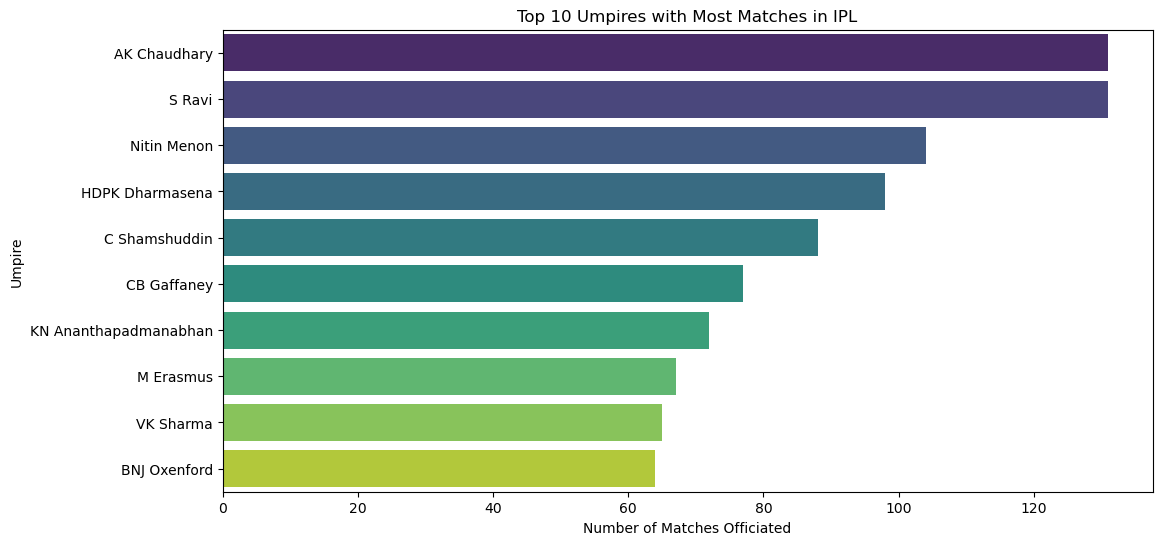

In [213]:
umpire_counts = IPL_matches[['umpire1', 'umpire2']].melt(value_name='Umpire').groupby('Umpire').size().reset_index(name='Matches')

top_umpires = umpire_counts.nlargest(10, 'Matches')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_umpires, x='Matches', y='Umpire', palette='viridis')
plt.xlabel("Number of Matches Officiated")
plt.ylabel("Umpire")
plt.title("Top 10 Umpires with Most Matches in IPL")
plt.show()


##### ->This bar plot provides valuable insights into the experience and presence of umpires in the IPL. Umpires like AK Chaudhary, S Ravi, and Nitin Menon have officiated the most matches, indicating their significant involvement and contribution to the league. This information can be useful for analyzing the performance and decision-making patterns of umpires, as well as understanding their influence on the game. Umpires with extensive experience are likely to bring consistency and reliability to their officiating, contributing to the overall fairness and integrity of the matches.


#### 2. Umpire Pairings with the Most Matches Together

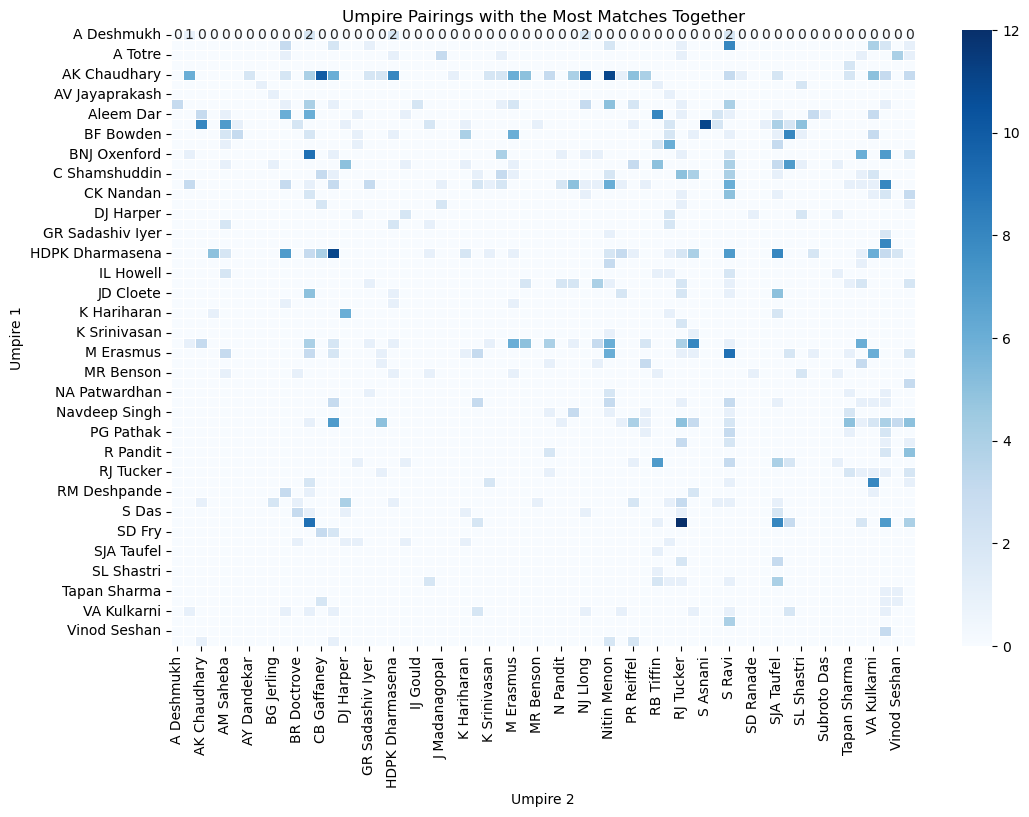

In [217]:
umpire_pairs = IPL_matches.groupby(['umpire1', 'umpire2']).size().reset_index(name='Matches')

umpire_heatmap = umpire_pairs.pivot(index='umpire1', columns='umpire2', values='Matches').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(umpire_heatmap, annot=True, fmt='.0f', cmap='Blues', linewidths=0.5)
plt.xlabel("Umpire 2")
plt.ylabel("Umpire 1")
plt.title("Umpire Pairings with the Most Matches Together")
plt.show()


##### ->This heatmap reveals the most common umpire pairings in IPL matches. Darker shades of blue indicate higher frequencies of matches umpired together. Identifying these common pairings is useful for analyzing umpire performance, consistency, and collaboration in the IPL. Frequent pairings may lead to better communication and understanding between umpires, potentially resulting in more accurate and consistent officiating. This analysis can be valuable for IPL management and teams to understand and optimize umpire assignments for future matches.



#### 3. Impact of Umpire Decisions on Match Outcomes

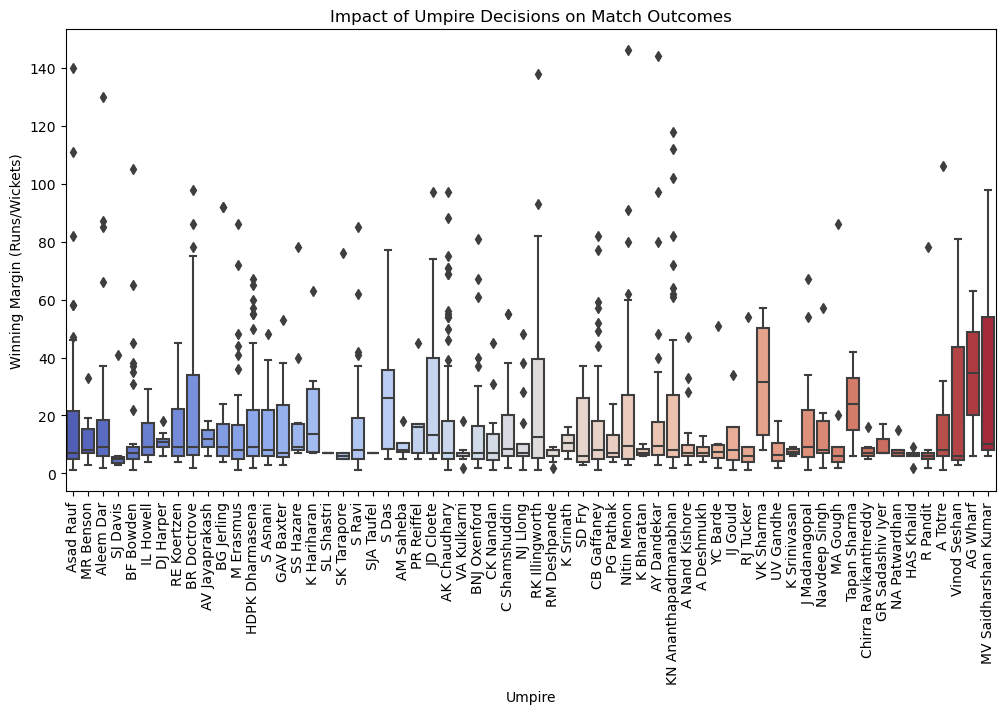

In [221]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=IPL_matches, x='umpire1', y='result_margin', palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel("Umpire")
plt.ylabel("Winning Margin (Runs/Wickets)")
plt.title("Impact of Umpire Decisions on Match Outcomes")
plt.show()


##### -> This visualization provides insights into the potential influence of umpires on match outcomes in the IPL. By analyzing the distribution of winning margins for each umpire, patterns or trends can be identified, suggesting that certain umpires may have a more significant impact on match results. This information is valuable for teams, analysts, and fans who are interested in understanding the role of umpiring in cricket matches. Understanding these patterns can help teams prepare better for matches and strategize accordingly.

In [225]:
IPL_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'dismissal_kind'],
      dtype='object')

In [231]:
IPL_deliveries.shape

(260920, 15)

In [227]:
IPL_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'umpire1', 'umpire2', 'home_team_won', 'total_runs'],
      dtype='object')

In [233]:
IPL_matches.shape

(1095, 21)

## Merging the IPL Datasets (IPL_matches & IPL_deliveries)

In [238]:
IPL_deliveries.rename(columns={'match_id': 'id'}, inplace=True)


In [240]:
IPL_deliveries.columns

Index(['id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'dismissal_kind'],
      dtype='object')

In [242]:
# merge the datasets on id column
IPL_merged = IPL_deliveries.merge(IPL_matches, how='left', on='id')

IPL_merged.head()


,id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,home_team_won,total_runs_y
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,False,363.0
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,False,363.0
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,False,363.0
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,False,363.0
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,False,363.0


In [244]:
IPL_merged.shape

(260920, 35)

## Merged Dataset Analysis

#### 1.Season-Wise Trends

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


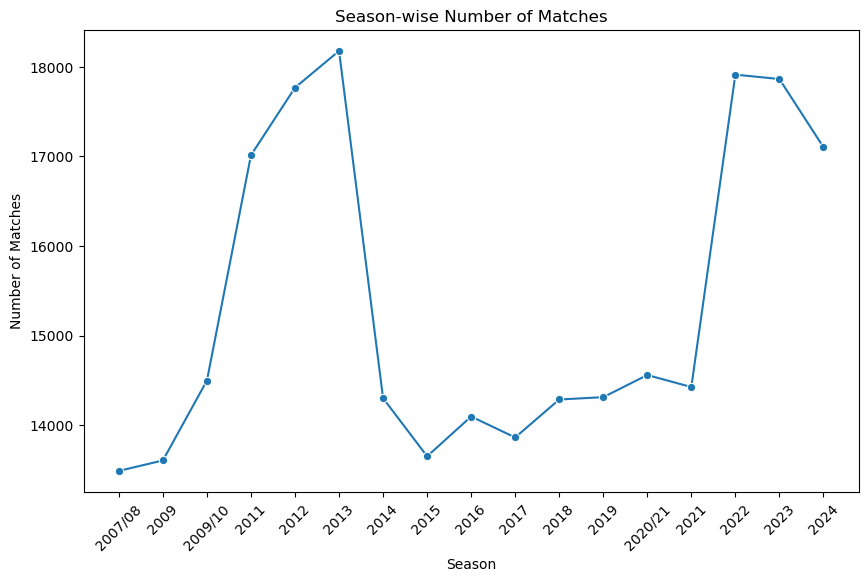

In [260]:

IPL_merged['season'] = IPL_merged['season'].astype(str)

matches_per_season = IPL_merged.groupby('season').size()

plt.figure(figsize=(10,6))
sns.lineplot(data=matches_per_season, marker='o')
plt.title('Season-wise Number of Matches')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()


##### -> The graph provides insights into the trends and variations in the number of IPL matches over the years. The peaks in the 2011/12 and 2023/24 seasons suggest an increase in the number of matches, which could be attributed to factors such as the addition of new teams, changes in the tournament format, or external factors influencing the schedule.

#### 2. Highest Total Scores by Season

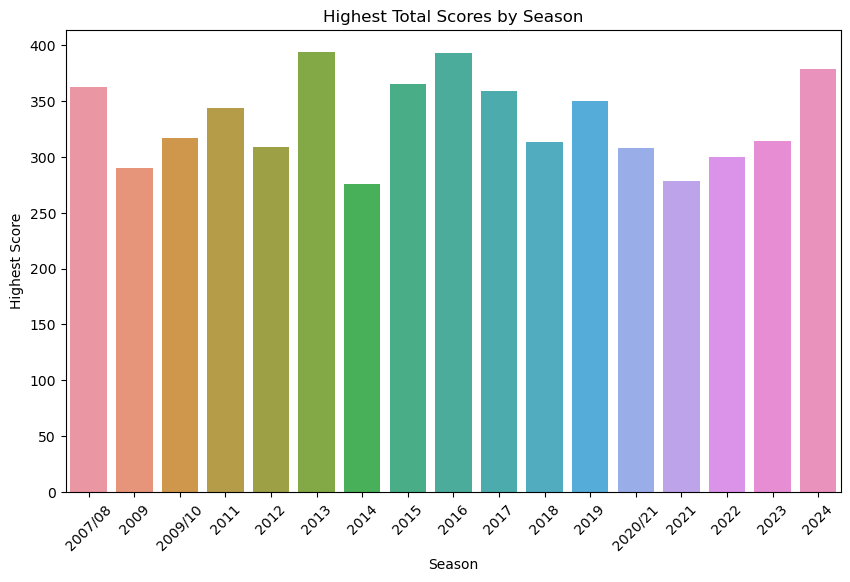

In [264]:
highest_scores_by_season = IPL_merged.groupby('season')['total_runs_y'].max()

plt.figure(figsize=(10,6))
sns.barplot(x=highest_scores_by_season.index, y=highest_scores_by_season.values)
plt.title('Highest Total Scores by Season')
plt.xlabel('Season')
plt.ylabel('Highest Score')
plt.xticks(rotation=45)
plt.show()


##### -> The visualization highlights the evolution and performance trends in the IPL over the years. It shows that the 2024 season had the highest total score, indicating an exceptional match or set of matches with significant scoring. The peaks in 2013 and 2016 also reflect high-scoring seasons, sugg

#### 3.Most Matches Won in a Single Season by a Team

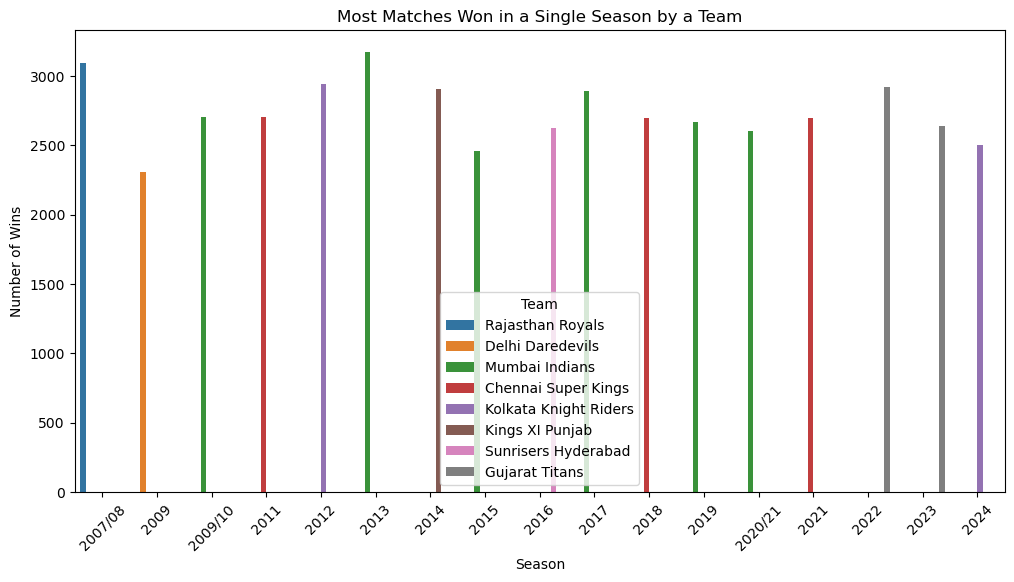

In [268]:
most_wins_by_team_season = IPL_merged.groupby(['season', 'winner']).size().reset_index(name='wins')

most_wins_per_season = most_wins_by_team_season.loc[most_wins_by_team_season.groupby('season')['wins'].idxmax()]

plt.figure(figsize=(12,6))
sns.barplot(x=most_wins_per_season['season'], y=most_wins_per_season['wins'], hue=most_wins_per_season['winner'])
plt.title('Most Matches Won in a Single Season by a Team')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.show()


##### -> The visualization highlights the performance trends of IPL teams over the years. Notably, teams like Chennai Super Kings (CSK) and Mumbai Indians (MI) have consistently achieved high numbers of wins in multiple seasons, underscoring their dominance in the league.The chart emphasizes the importance of team strategies, player performances, and management in achieving consistent success in the league. If you need further analysis or specific details, feel free to ask!